<a href="https://colab.research.google.com/github/jiayuankeliang/309CourseWork2/blob/main/309CourseWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import moudle

In [132]:
import os
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

load data

In [133]:
path = './data/train'
img_list= []
label_list = []
for label in os.listdir(path):
  for file_name in os.listdir(os.path.join(path, label)):
    img = Image.open(os.path.join(path, label, file_name))
    img = img.resize(size=(32,32))
    img_list.append(np.array(img))
    label_list.append(label)

all classes

In [134]:
class_name = ['speed_limit_20', 'speed_limit_30', 'speed_limit_50', 'speed_limit_60', 'speed_limit_70', 'speed_limit_80', 'lift__speed_limit_80', 'speed_limit_100']

check shape

In [135]:
X_train = np.array(img_list, dtype=int)
Y_train = np.array(label_list, ndmin=1, dtype=int)
X_train.shape, Y_train.shape

((10499, 32, 32, 3), (10499,))

feature scale

In [136]:
X_train = X_train/255

show image

speed_limit_70


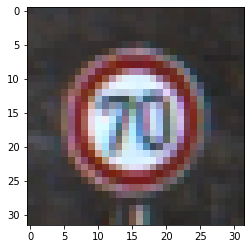

In [137]:
index = 8001
print(class_name[Y_train[index]])
plt.imshow(X_train[index])

create a simple model

In [138]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(8, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs = 30, validation_split=0.1)

Epoch 1/30
296/296 [==============================] - 31s 26ms/step - loss: 1.0569 - accuracy: 0.6309 - val_loss: 2.5611 - val_accuracy: 0.1724
Epoch 2/30
296/296 [==============================] - 7s 23ms/step - loss: 0.5231 - accuracy: 0.8189 - val_loss: 3.1479 - val_accuracy: 0.3705
Epoch 3/30
296/296 [==============================] - 7s 23ms/step - loss: 0.4106 - accuracy: 0.8541 - val_loss: 4.0514 - val_accuracy: 0.3695
Epoch 4/30
296/296 [==============================] - 6s 20ms/step - loss: 0.3271 - accuracy: 0.8836 - val_loss: 4.7288 - val_accuracy: 0.2571
Epoch 5/30
296/296 [==============================] - 8s 27ms/step - loss: 0.2931 - accuracy: 0.8961 - val_loss: 4.4297 - val_accuracy: 0.3048
Epoch 6/30
296/296 [==============================] - 6s 20ms/step - loss: 0.2606 - accuracy: 0.9072 - val_loss: 4.8652 - val_accuracy: 0.3514
Epoch 7/30
296/296 [==============================] - 8s 28ms/step - loss: 0.2477 - accuracy: 0.9145 - val_loss: 5.4306 - val_accuracy: 0.316

train error and val error

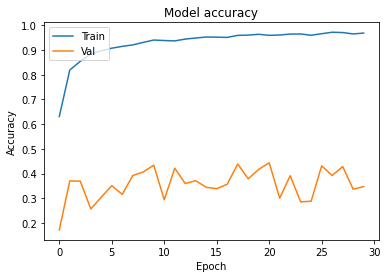

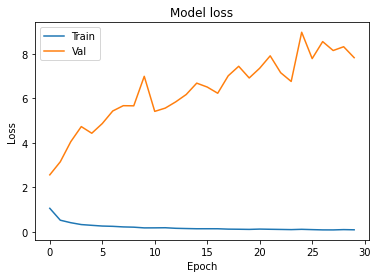

In [139]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**😅overfitting**